In [1]:
using Distributions
using HypothesisTests
using StatsPlots
default(size=(500, 300))

function pval_t(null, X)
    μ = mean(null)
    n = length(X)
    T = (mean(X) - μ)/√(var(X)/n)
    2ccdf(TDist(n-1), abs(T))
end

function pval_wilcoxon(null, X)
    m = quantile(null, 0.5) # median of null
    W = HypothesisTests.SignedRankTest(X .- m)
    pvalue(W)
end

function plot_pvals(;
        pval = pval_wilcoxon,
        null = Gamma(4, 1),
        n = 100,
        L = 10^6
    )
    PVal = similar(zeros(), L)
    for i in 1:L
        X = rand(null, n)
        PVal[i] = pval(null, X)
    end
    realalpha = mean(PVal .< 0.05)
    histogram(PVal; norm=true, alpha=0.3, bin=0.001:0.025:1.001, label="")
    plot!(; xtick=0:0.05:1, xrotation=90, bottom_margin=3Plots.mm)
    title!("""
        pval = $pval
        null = $null,  n = $n
        P(p-value < 0.05) = $realalpha,  niters = $L""",
        titlefontsize=8)
end

function plot_both(;
        null = Gamma(4, 1),
        n = 100,
        L = 10^6
    )
    P = plot_pvals(; pval = pval_t, null, n, L)
    Q = plot_pvals(; pval = pval_wilcoxon, null, n, L)
    plot(P, Q; size=(500, 600), layout=(2, 1), tickfontsize=8)
end

plot_both (generic function with 1 method)

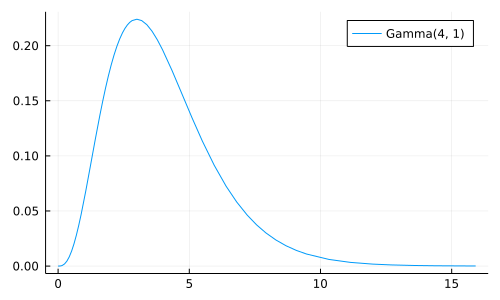

In [2]:
plot(Gamma(4, 1); label="Gamma(4, 1)")

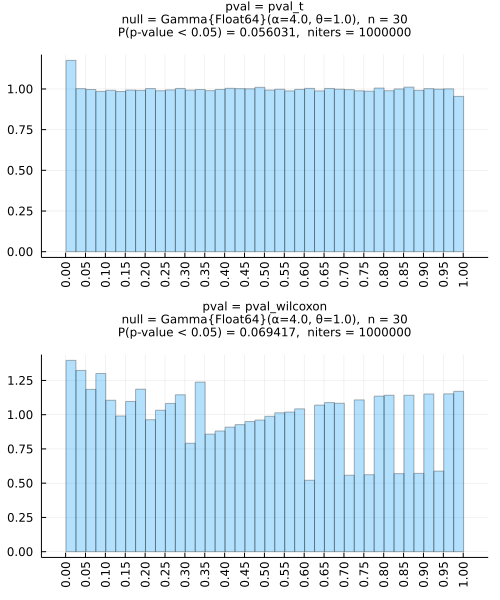

In [3]:
plot_both(; null = Gamma(4, 1), n = 30)

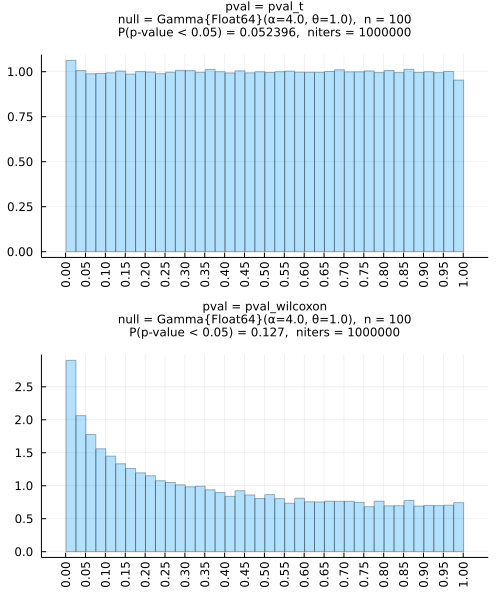

In [4]:
plot_both(; null = Gamma(4, 1), n = 100)

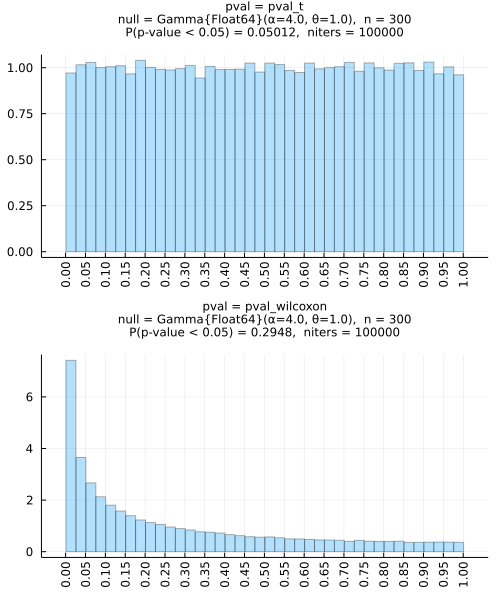

In [5]:
plot_both(null = Gamma(4, 1), n = 300, L=10^5)

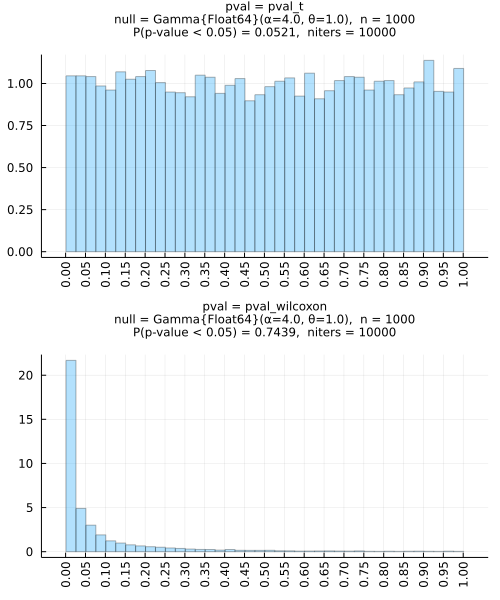

In [6]:
plot_both(; null = Gamma(4, 1), n = 1000, L=10^4)

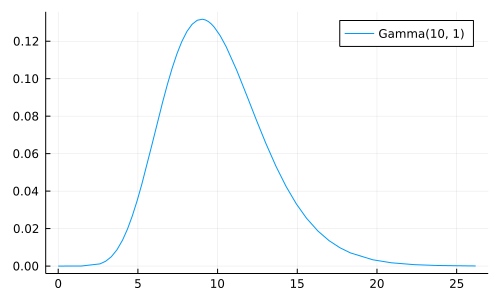

In [7]:
plot(Gamma(10, 1); label="Gamma(10, 1)")

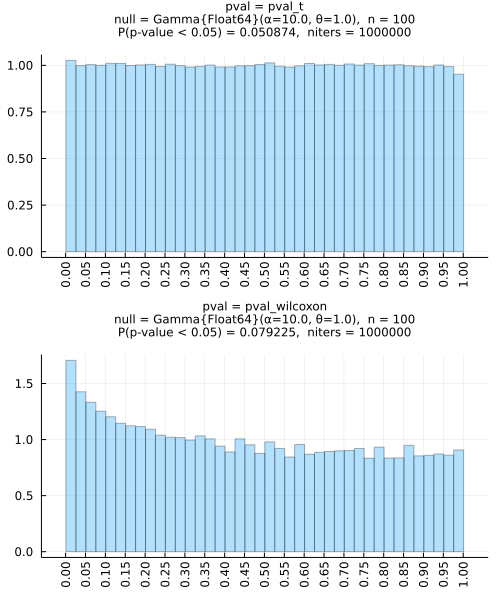

In [8]:
plot_both(; null = Gamma(10, 1))

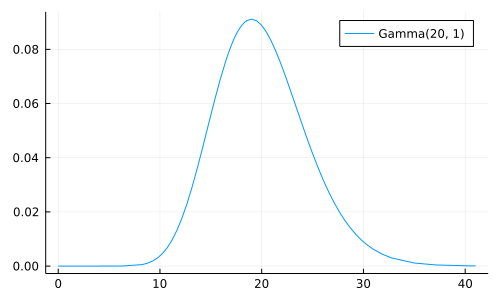

In [9]:
plot(Gamma(20, 1); label="Gamma(20, 1)")

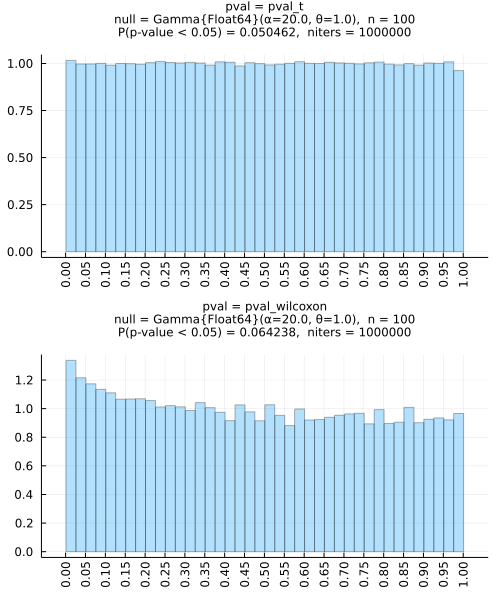

In [10]:
plot_both(; null = Gamma(20, 1))

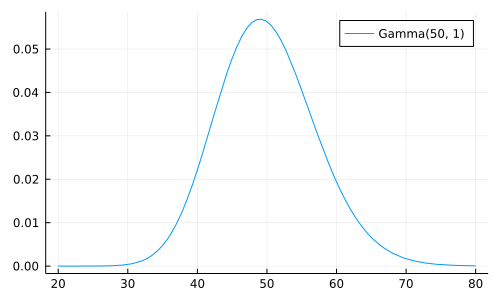

In [11]:
plot(Gamma(50, 1), 20, 80; label="Gamma(50, 1)")

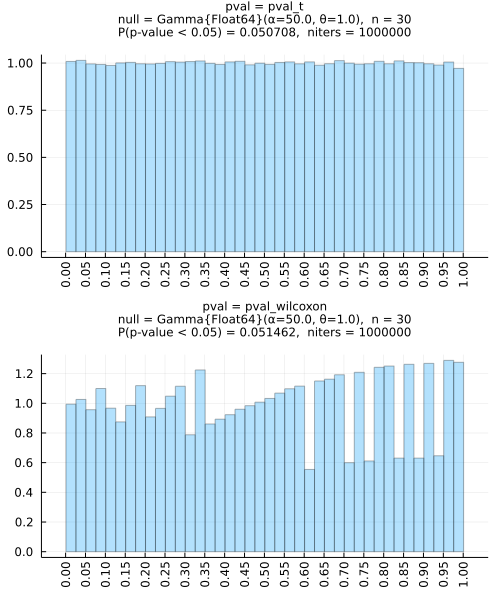

In [12]:
plot_both(; null = Gamma(50, 1), n = 30)

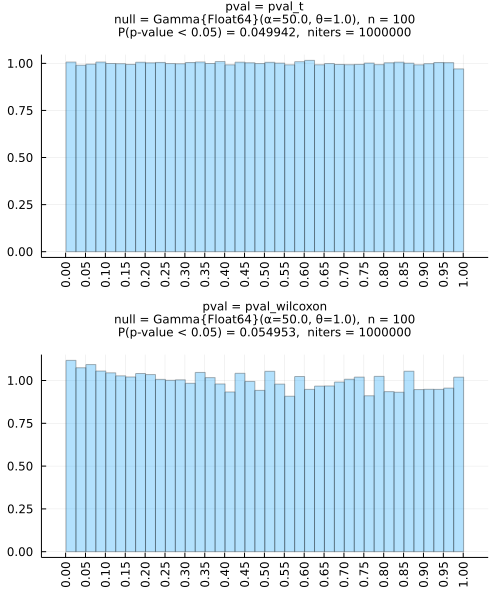

In [13]:
plot_both(; null = Gamma(50, 1), n = 100)

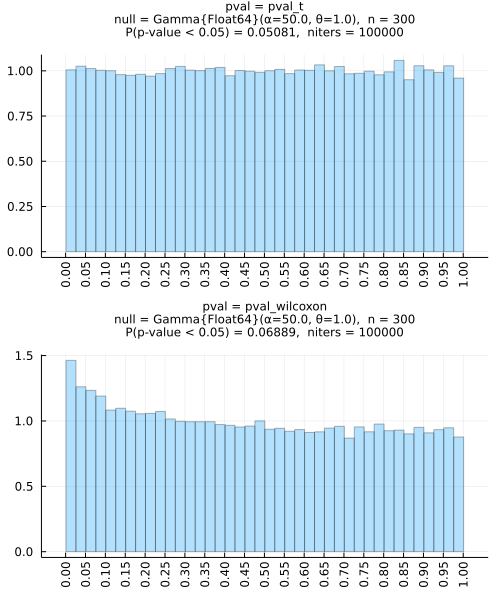

In [14]:
plot_both(; null=Gamma(50, 1), n = 300, L=10^5)

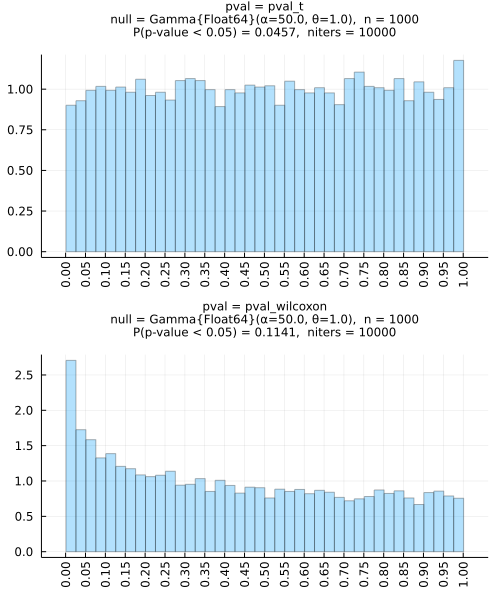

In [15]:
plot_both(; null=Gamma(50, 1), n = 1000, L=10^4)

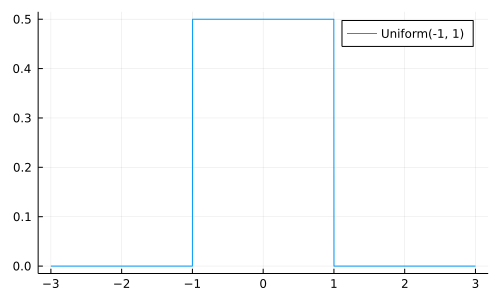

In [16]:
plot(Uniform(-1, 1), -3, 3; label="Uniform(-1, 1)")

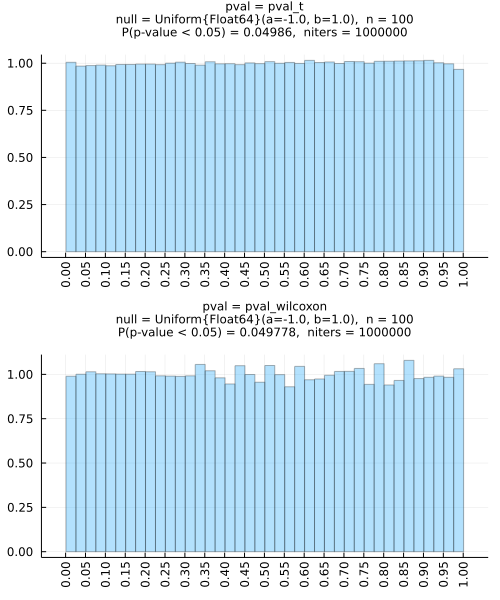

In [17]:
plot_both(; null = Uniform(-1, 1))

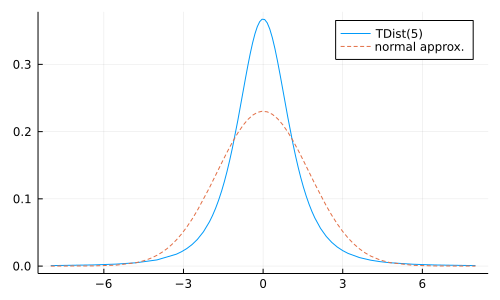

In [18]:
null = TDist(3)
plot(null, -8, 8; label="TDist(5)")
plot!(Normal(mean(null), std(null)), -8, 8; label="normal approx.", ls=:dash)

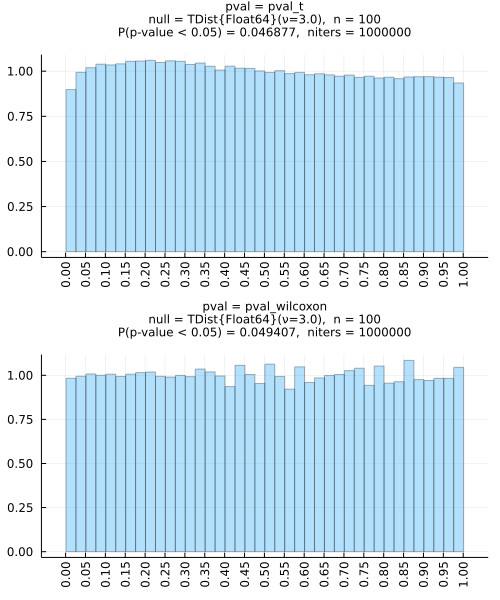

In [19]:
plot_both(; null)